<a href="https://colab.research.google.com/github/jkjh23/busan_AI_2020/blob/master/4_DeepLearning/08_pyTorch_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pyTorch(파이토치)

- [파이토치 시작하기](https://pytorch.org/get-started/locally/)
  - 개발 환경에 따라 설치하는 조합이 잘 나와있다.
  - 실제로 구축해보면, pyTorch가 CUDA와 가장 잘 연동된다.
  - CUDA vs ROCm : 현재 CUDA만 지원

## 특징

- Define by Run 방식
- 파이썬 짜듯이 작성 가능
- 디버깅 용이, 즉시 확인 가능
- numpy 베이스로 작동
  - Scipy, Numpy, Cython
  

In [1]:
import torch

In [2]:
torch.__version__
# 최신 버전으로 적용되어 있다.

'1.6.0+cu101'

- <img src="https://drive.google.com/uc?id=1PzcpfZlUc6Aovz9PsAq0Y-PJIm3ZcIg8" width="80%">
- pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# 텐서

- 텐서플로, 파이토치 등은 텐서를 기반으로 진행되는 연산을 수행하고, 딥러닝은 이런 연산의 연속이다.
- 딥러닝 연산의 기본 단위
- 행렬
- <img src="https://drive.google.com/uc?id=1GXInEu6qtFuzp-OkoiH6RFGcpYanV7RM" width="100%">



In [3]:
# 텐서 생성
# 리스트, 배열로부터 생성 가능
# 기본 자료형 float32

In [4]:
# 리스트
list_src = [[10,11,12], [13,14,15]]   # (2,3)
# 텐서 생성
x = torch.Tensor(list_src)
x

tensor([[10., 11., 12.],
        [13., 14., 15.]])

In [5]:
# 텐서를 다시 리스트로 변환
x.tolist()

[[10.0, 11.0, 12.0], [13.0, 14.0, 15.0]]

In [6]:
# 배열 생성
import numpy as np
arr = np.array(list_src)
arr
# 원래 타입대로 값이 적용(텐서는 float으로 변함)

array([[10, 11, 12],
       [13, 14, 15]])

In [7]:
# 생성 : 배열을 재료로
x = torch.Tensor(arr)
x

tensor([[10., 11., 12.],
        [13., 14., 15.]])

In [8]:
# 텐서를 다시 배열로 변환
x.numpy()
# 복원은 됐으나 원래 타입으로 돌아가지 않는다.

array([[10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

In [10]:
# 랜덤값으로 텐서 생성
torch.rand(2,3)

tensor([[0.0893, 0.1657, 0.5389],
        [0.5924, 0.1121, 0.1147]])

In [14]:
# low는 포함되고 high는 포함되지 않음(low <= x < high)
torch.randint( low=0, high=3, size=(2,3) )

tensor([[2, 0, 1],
        [1, 2, 1]])

In [15]:
# 제로 행렬, 영행렬
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [16]:
# 구성원이 모두 1인 행렬
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [19]:
# 영행렬 생성, 대상이 되는 텐서의 크기와 동일
# x 텐서의 shape을 본따서 영행렬 생성
# 계산의 편의성 때문에 나온 함수
a = torch.ones(2,2)
torch.zeros_like(a)

tensor([[0., 0.],
        [0., 0.]])

In [24]:
torch.ones_like(a)

tensor([[1., 1.],
        [1., 1.]])

In [23]:
print(torch.ones_like(torch.ones(2,3))) 
print(torch.ones_like(torch.ones(2,3)).T)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


# GPU 사용

In [9]:
# 현재 device는 cpu
x.device

device(type='cpu')

In [ ]:
aa # 오류 발생, 밑은 GPU로 바꾼 후 실행

In [10]:
try : 
  # x라는 텐서에 device를 지정
  x.to('cuda')
  # 텐서별로 지정 가능
  print(x.device)
except Exception as e :
  print(e)
  pass

cuda runtime error (100) : no CUDA-capable device is detected at /pytorch/aten/src/THC/THCGeneral.cpp:47


In [ ]:
# 현재 하드웨어에서 GPU에 대한 지원사항
# 노트 설정을 GPU로 변경 후 사용

try : 
  # CUDA 사용이 가능한가
  print(torch.cuda.is_available())
  # 현재 사용하는 GPU
  print(torch.cuda.current_device())
  # GPU의 개수
  print(torch.cuda.device_count())
  # 장비명
  print(torch.cuda.get_device_name(torch.cuda.current_device()))
except Exception as e : pass

In [ ]:
try : 
  # 전체 적용
  torch.device('cuda')
except Exception as e : pass

In [ ]:
try :
  # 사용한 메모리 회수
  torch.cuda.empty_cache()
except Exception as e : pass

# 텐서 타입

- <img src="https://drive.google.com/uc?id=1GP0cXwtA7rseScIGnhgZ_jPrqth-wRR0" width="80%">

  - 타입은 크게 float 계열, integer 계열(정수 계열), boolean 계열로 나눠진다. => 딥러닝 시 데이터는 수치여야 한다.
  - CPU용 텐서와 GPU용 텐서로 종류가 나눠진다.

In [ ]:
# torch.Tenseor() => 기본 타입 torch.float32
# 타입을 변경하고 싶으면 파라미터에서 지정 가능하다.

In [26]:
# 실수 타입 텐서
a = torch.FloatTensor(np.array([1,2,3,4]))
# type(a)  : 파이썬 함수
# a.type() : 토치 함수, 문자열로 나옴
# a.dtype  : 넘파이 함수
a, type(a), a.type(), a.dtype

(tensor([1., 2., 3., 4.]), torch.Tensor, 'torch.FloatTensor', torch.float32)

In [27]:
a = torch.LongTensor(np.array([1,2,3,4]))
a, type(a), a.type(), a.dtype

(tensor([1, 2, 3, 4]), torch.Tensor, 'torch.LongTensor', torch.int64)

In [30]:
a = torch.BoolTensor(np.array([True,False,True,False]))
a, type(a), a.type(), a.dtype

(tensor([ True, False,  True, False]),
 torch.Tensor,
 'torch.BoolTensor',
 torch.bool)

# 텐서 조작(연산)

In [31]:
# torch 난수 고정
torch.manual_seed(1024)

In [32]:
# 행렬
x = torch.randint(0, 10, size=(2,3,4))
x

tensor([[[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]],

        [[8, 7, 4, 9],
         [3, 1, 3, 9],
         [2, 3, 3, 9]]])

In [36]:
# 차원(dimension)
# dim은 torch에서 정의한 것, ndim은 numpy에서 넘어온 것
f'x는 {x.dim()}-D Tesnor다.', x.ndim

('x는 3-D Tesnor다.', 3)

In [37]:
# shape
x.shape

torch.Size([2, 3, 4])

# slicing, indexing

In [38]:
# 인덱싱 -> 차원축소
x[0], x[0].dim()

(tensor([[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]]), 2)

In [41]:
# 차원을 내려가거나, 차원을 나열하면서 추출 가능 -> df의 iloc, np의 펜시인덱싱과 스타일이 동일하다.
x[0][0], x[0][0][0], x[0, 0], x[0, 0, 0]

(tensor([7, 1, 1, 4]), tensor(7), tensor([7, 1, 1, 4]), tensor(7))

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
x.shape, len(x), x.shape[0]

(torch.Size([2, 3, 4]), 2, 2)

In [54]:
# 시각화를 통해서 행렬을 표현
# Dimension이 3인 행렬만 그릴 수 있다.
def drawTensor(src) :
  # 1차원의 개수 => 현재 (2,1)
  fig, axes = plt.subplots(len(src), 1)
  for i in range(len(src)) :
    axes[i].matshow(src[i].numpy(), vmin=0, vmax=1, cmap='gray')
  plt.show()

In [56]:
# 모든 구성원이 1인 행렬
tmp = torch.ones_like(x)
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

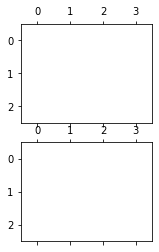

In [57]:
drawTensor(tmp)

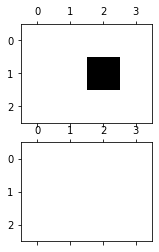

In [59]:
tmp[0,1,2] = 0
drawTensor(tmp)

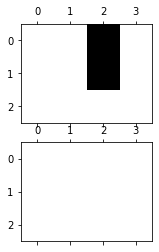

In [60]:
tmp[0,:2,2] = 0
drawTensor(tmp)

# view
- numpy 기준으로 표현한다면 reshape

In [63]:
# numpy에서 사용하는 표현
x.shape, x.dtype, x.ndim

(torch.Size([2, 3, 4]), torch.int64, 3)

In [69]:
# 데이터의 차원이 변경될 뿐, 값의 순서는 동일하다.
print(x)
print(x.reshape(2,2,6))

tensor([[[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]],

        [[8, 7, 4, 9],
         [3, 1, 3, 9],
         [2, 3, 3, 9]]])
tensor([[[7, 1, 1, 4, 5, 1],
         [1, 8, 9, 6, 5, 4]],

        [[8, 7, 4, 9, 3, 1],
         [3, 9, 2, 3, 3, 9]]])


In [70]:
# torch에서 shape 변경할 때, 가급적이면 view를 사용하라.
x.view(2,2,6)

tensor([[[7, 1, 1, 4, 5, 1],
         [1, 8, 9, 6, 5, 4]],

        [[8, 7, 4, 9, 3, 1],
         [3, 9, 2, 3, 3, 9]]])

In [73]:
# 맨앞을 -1로 두고 뒤쪽에 집중해서 차원값을 정리하면 간편하게 계산해준다.
x.view(-1, 1, 12)

tensor([[[7, 1, 1, 4, 5, 1, 1, 8, 9, 6, 5, 4]],

        [[8, 7, 4, 9, 3, 1, 3, 9, 2, 3, 3, 9]]])

# transpose
- 차원 간 맞교환
- (2,3,4) -> (3,2,4) : 1차원과 2차원을 맞교환

In [74]:
x

tensor([[[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]],

        [[8, 7, 4, 9],
         [3, 1, 3, 9],
         [2, 3, 3, 9]]])

In [75]:
x.shape

torch.Size([2, 3, 4])

In [77]:
# 차원 표기는 0부터 출발
# (0,1) => 첫번째 차원과 두번째 차원을 맞교환하시오.
x.transpose(0,1)

tensor([[[7, 1, 1, 4],
         [8, 7, 4, 9]],

        [[5, 1, 1, 8],
         [3, 1, 3, 9]],

        [[9, 6, 5, 4],
         [2, 3, 3, 9]]])

In [78]:
x.transpose(0,1).shape

torch.Size([3, 2, 4])

# squeeze, unsqueeze
- squeeze : 1차원 제거
- unsqueeze : 1차원 추가

In [79]:
x = torch.rand((3,1,2,4,1))
x

tensor([[[[[0.7811],
           [0.0282],
           [0.0970],
           [0.9834]],

          [[0.3089],
           [0.9617],
           [0.2606],
           [0.3893]]]],



        [[[[0.3813],
           [0.8005],
           [0.9846],
           [0.1103]],

          [[0.5169],
           [0.3025],
           [0.7295],
           [0.2983]]]],



        [[[[0.9722],
           [0.6141],
           [0.4937],
           [0.0130]],

          [[0.6209],
           [0.0591],
           [0.5611],
           [0.5226]]]]])

In [80]:
x.shape

torch.Size([3, 1, 2, 4, 1])

In [83]:
# 모든 차원에서 크기가 1인 Dimension 제거
# shape은 numpy, size는 torch : 차원 크기 확인
x.squeeze().shape, x.squeeze().size()

(torch.Size([3, 2, 4]), torch.Size([3, 2, 4]))

In [84]:
x.squeeze()

tensor([[[0.7811, 0.0282, 0.0970, 0.9834],
         [0.3089, 0.9617, 0.2606, 0.3893]],

        [[0.3813, 0.8005, 0.9846, 0.1103],
         [0.5169, 0.3025, 0.7295, 0.2983]],

        [[0.9722, 0.6141, 0.4937, 0.0130],
         [0.6209, 0.0591, 0.5611, 0.5226]]])

In [85]:
x.size()

torch.Size([3, 1, 2, 4, 1])

In [86]:
# 특정 위치에서 1D를 제거하는 방법
x.squeeze(1)

tensor([[[[0.7811],
          [0.0282],
          [0.0970],
          [0.9834]],

         [[0.3089],
          [0.9617],
          [0.2606],
          [0.3893]]],


        [[[0.3813],
          [0.8005],
          [0.9846],
          [0.1103]],

         [[0.5169],
          [0.3025],
          [0.7295],
          [0.2983]]],


        [[[0.9722],
          [0.6141],
          [0.4937],
          [0.0130]],

         [[0.6209],
          [0.0591],
          [0.5611],
          [0.5226]]]])

In [87]:
x.squeeze(1).size()

torch.Size([3, 2, 4, 1])

In [88]:
x.squeeze(4)

tensor([[[[0.7811, 0.0282, 0.0970, 0.9834],
          [0.3089, 0.9617, 0.2606, 0.3893]]],


        [[[0.3813, 0.8005, 0.9846, 0.1103],
          [0.5169, 0.3025, 0.7295, 0.2983]]],


        [[[0.9722, 0.6141, 0.4937, 0.0130],
          [0.6209, 0.0591, 0.5611, 0.5226]]]])

In [90]:
x.squeeze(4).size()

torch.Size([3, 1, 2, 4])

In [94]:
# [3, 1, 2, 4, 1] -> [3, 2, 1, 4], 데이터의 순서는 유지할 것(transpose는 쓸 수 없음)
x.squeeze().unsqueeze(2)

tensor([[[[0.7811, 0.0282, 0.0970, 0.9834]],

         [[0.3089, 0.9617, 0.2606, 0.3893]]],


        [[[0.3813, 0.8005, 0.9846, 0.1103]],

         [[0.5169, 0.3025, 0.7295, 0.2983]]],


        [[[0.9722, 0.6141, 0.4937, 0.0130]],

         [[0.6209, 0.0591, 0.5611, 0.5226]]]])

In [95]:
x.squeeze().unsqueeze(2).size()

torch.Size([3, 2, 1, 4])

# cat, stack
- 텐서를 합친다.
- cat
  - 단순 합치기
- stack
  - 쌓는다.

In [96]:
x

tensor([[[[[0.7811],
           [0.0282],
           [0.0970],
           [0.9834]],

          [[0.3089],
           [0.9617],
           [0.2606],
           [0.3893]]]],



        [[[[0.3813],
           [0.8005],
           [0.9846],
           [0.1103]],

          [[0.5169],
           [0.3025],
           [0.7295],
           [0.2983]]]],



        [[[[0.9722],
           [0.6141],
           [0.4937],
           [0.0130]],

          [[0.6209],
           [0.0591],
           [0.5611],
           [0.5226]]]]])

In [97]:
x.ndim, x.shape

(5, torch.Size([3, 1, 2, 4, 1]))

In [99]:
x.ndimension(), x.size()

(5, torch.Size([3, 1, 2, 4, 1]))

In [100]:
a = torch.rand((2,3))
a

tensor([[0.2338, 0.4780, 0.7890],
        [0.3664, 0.7937, 0.9290]])

In [101]:
b = torch.rand((2,3))
b

tensor([[0.8352, 0.6012, 0.4603],
        [0.6794, 0.9339, 0.2197]])

In [106]:
# cat
# same shape 형태로, 리스트[]나 튜플() 형태로 표현 가능
# dim : 단순 합치기를 위한 기준 차원
tmp = torch.cat([a,b], dim=0)
tmp, tmp.size()
# ndim값은 동일, 0차원의 개수가 증가되었다.

(tensor([[0.2338, 0.4780, 0.7890],
         [0.3664, 0.7937, 0.9290],
         [0.8352, 0.6012, 0.4603],
         [0.6794, 0.9339, 0.2197]]), torch.Size([4, 3]))

In [103]:
# 같은 포지션끼리 붙어서 완성되었다.
tmp = torch.cat([a,b], dim=1)
tmp.size(), tmp

(torch.Size([2, 6]), tensor([[0.2338, 0.4780, 0.7890, 0.8352, 0.6012, 0.4603],
         [0.3664, 0.7937, 0.9290, 0.6794, 0.9339, 0.2197]]))

In [105]:
# stack : 쌓는다.
tmp = torch.stack([a,b], dim=0)
tmp, tmp.size()

(tensor([[[0.2338, 0.4780, 0.7890],
          [0.3664, 0.7937, 0.9290]],
 
         [[0.8352, 0.6012, 0.4603],
          [0.6794, 0.9339, 0.2197]]]), torch.Size([2, 2, 3]))

In [107]:
# 같은 포지션끼리 묶어서 새로운 차원에 쌓아두었다.
tmp = torch.stack([a,b], dim=1)
tmp, tmp.size()

(tensor([[[0.2338, 0.4780, 0.7890],
          [0.8352, 0.6012, 0.4603]],
 
         [[0.3664, 0.7937, 0.9290],
          [0.6794, 0.9339, 0.2197]]]), torch.Size([2, 2, 3]))

# 사칙연산

- +, -, *, /
- 브로드 캐스팅 적용 가능
- 연산의 대상이 되는 텐서들의 shape을 보고 가능 여부 확인

In [115]:
x = torch.Tensor([1,2,3])
y = torch.Tensor([4,5,6])
z = torch.Tensor([10])
x, y, z, x.size(), y.size(), z.size()

(tensor([1., 2., 3.]),
 tensor([4., 5., 6.]),
 tensor([10.]),
 torch.Size([3]),
 torch.Size([3]),
 torch.Size([1]))

In [113]:
# 덧셈
# 같은 원소 자리끼리 더해서, 그 자리에 대체됨
# [1+4, 2+5, 3+6]
x + y, (x+y).size(), torch.add(x,y), torch.add(x,y).size()

(tensor([5., 7., 9.]), torch.Size([3]), tensor([5., 7., 9.]), torch.Size([3]))

In [116]:
# z는 x에 비해서 원소가 적은데, 왜 덧셈이 되는가?
# y = x * W + b할 때, b가 xW에 비해서 원소수가 적은데 왜 계산이 되는가? => 브로드캐스팅 발생
x + z

tensor([11., 12., 13.])

- 브로드 캐스팅 : stretch가 발생해서 연산이 수행될 수 있게 동일값으로 늘려주어서 계산이 진행되도록 도움을 준다.
  - <img src="https://drive.google.com/uc?id=1GH-5PErVO094b792wD_O7Sw9wvQfLlRl" width="60%">
  - <img src="https://drive.google.com/uc?id=1GAiJ-vdrdjygMBeIjmILotyE21V1owuB" width="60%">
  - <img src="https://drive.google.com/uc?id=1G8tC3rEVKbwX-xrkKjkRXe8gElDOE174" width="60%">
  - <img src="https://drive.google.com/uc?id=1G8sA8dn0_9dZ1wq1ELMoepR3I_4Z2qAL" width="60%">

    - 앞뒤가 전부 브로드 캐스팅이 진행된 경우

In [117]:
x - y, (x-y).size(), torch.sub(x,y), torch.sub(x,y).size()

(tensor([-3., -3., -3.]),
 torch.Size([3]),
 tensor([-3., -3., -3.]),
 torch.Size([3]))

In [118]:
x * y, (x*y).size(), torch.mul(x,y), torch.mul(x,y).size()

(tensor([ 4., 10., 18.]),
 torch.Size([3]),
 tensor([ 4., 10., 18.]),
 torch.Size([3]))

In [119]:
x / y, (x/y).size(), torch.div(x,y), torch.div(x,y).size()

(tensor([0.2500, 0.4000, 0.5000]),
 torch.Size([3]),
 tensor([0.2500, 0.4000, 0.5000]),
 torch.Size([3]))

# 기타 연산

In [121]:
x, y

(tensor([1., 2., 3.]), tensor([4., 5., 6.]))

In [120]:
# 벡터 대 스칼라 연산과 동일, 행렬에 스칼라를 더한 경우
x+1

tensor([2., 3., 4.])

- y = xW+b
  - xW에 해당하는 계산식은 셋 중 무엇인가?
    - *(텐서 곱하기) : 해당사항 없음
    - dot
    - mm

In [123]:
# 내적
# 32 = 1*4 + 2*5 + 3*6
torch.dot(x, y), x.dot(y)

(tensor(32.), tensor(32.))

In [125]:
x = torch.Tensor([[1,3],[2,3],[5,6]])
y = torch.Tensor([[7,8],[9,10]])
print(x)
print(y)
print(x.size(), y.size())

tensor([[1., 3.],
        [2., 3.],
        [5., 6.]])
tensor([[ 7.,  8.],
        [ 9., 10.]])
torch.Size([3, 2]) torch.Size([2, 2])


In [127]:
# 34 = 1*7 + 3*9
tmp = torch.mm(x,y)
tmp, tmp.size()

(tensor([[ 34.,  38.],
         [ 41.,  46.],
         [ 89., 100.]]), torch.Size([3, 2]))

In [128]:
x.mm(y)

tensor([[ 34.,  38.],
        [ 41.,  46.],
        [ 89., 100.]])

In [132]:
try :
  x*y
except Exception as e :
  print("오류 발생 :", e)

오류 발생 : The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0


# sum, mean

In [134]:
x = torch.Tensor([1,2,3,4,5,6,7,8])
x, x.size()

(tensor([1., 2., 3., 4., 5., 6., 7., 8.]), torch.Size([8]))

In [136]:
x = x.view(2,2,2)
x, x.size()

(tensor([[[1., 2.],
          [3., 4.]],
 
         [[5., 6.],
          [7., 8.]]]), torch.Size([2, 2, 2]))

In [138]:
# 차원에 상관없이 모든 구성원에 대한 합산, 평균
torch.sum(x), torch.mean(x)

(tensor(36.), tensor(4.5000))

In [140]:
# 4 = 1+3, 6 = 2+4, ...
torch.sum(x, dim=1), torch.sum(x, dim=1).size()

(tensor([[ 4.,  6.],
         [12., 14.]]), torch.Size([2, 2]))

In [141]:
# 4 = 1+5, 6 = 2+6, ...
torch.sum(x, dim=0), torch.sum(x, dim=0).size()

(tensor([[ 6.,  8.],
         [10., 12.]]), torch.Size([2, 2]))

In [142]:
# 3은 1, 5의 평균 / 4는 2와 6의 평균 / ...
torch.mean(x, dim=0), torch.mean(x, dim=0).size()

(tensor([[3., 4.],
         [5., 6.]]), torch.Size([2, 2]))

In [143]:
# 2는 1, 3의 평균 / ...
# => CNN의 pooling에서 풀링 값을 추출할 때, 최대/평균/최소 등에서 사용할 수 있음
torch.mean(x, dim=1), torch.mean(x, dim=1).size()

(tensor([[2., 3.],
         [6., 7.]]), torch.Size([2, 2]))

# max, min, argmax, argmin

In [151]:
x

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [152]:
# 모든 구성원 중에 제일 큰/작은 값
torch.max(x), torch.min(x)

(tensor(8.), tensor(1.))

In [153]:
# 모든 원소 내에서 최대값/최대값의 인덱스는 1차원으로 펴서(Flattern) 순서대로 계산
torch.argmax(x), torch.argmin(x)

(tensor(7), tensor(0))

In [149]:
# dim=0 : 1과 5를 비교해서 5 선택, 2와 6을 비교해서 6 선택, ...
# dim=1 : 1과 3을 비교해서 3 선택, 2와 4를 비교해서 4 선택, ...
# 최대 풀링 연산의 기초
torch.max(x, dim=0), torch.max(x, dim=1)

(torch.return_types.max(values=tensor([[5., 6.],
        [7., 8.]]), indices=tensor([[1, 1],
        [1, 1]])),
 torch.return_types.max(values=tensor([[3., 4.],
        [7., 8.]]), indices=tensor([[1, 1],
        [1, 1]])))

# 논리

In [155]:
x = torch.Tensor([-2,4,0])

In [156]:
# 텐서의 조건식 처리 -> 블리언 인덱싱 처리
x == 0

tensor([False, False,  True])

In [158]:
torch.eq(x, 0), x.eq(0)

(tensor([False, False,  True]), tensor([False, False,  True]))

In [160]:
x >= 0, torch.ge(x, 0), x.ge(0)

(tensor([False,  True,  True]),
 tensor([False,  True,  True]),
 tensor([False,  True,  True]))

In [161]:
x > 0, torch.gt(x, 0), x.gt(0)

(tensor([False,  True, False]),
 tensor([False,  True, False]),
 tensor([False,  True, False]))

In [162]:
x <= 0, torch.le(x, 0), x.le(0)

(tensor([ True, False,  True]),
 tensor([ True, False,  True]),
 tensor([ True, False,  True]))

In [163]:
x < 0, torch.lt(x, 0), x.lt(0)

(tensor([ True, False, False]),
 tensor([ True, False, False]),
 tensor([ True, False, False]))